In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
 90% 89.0M/98.7M [00:00<00:00, 133MB/s]
100% 98.7M/98.7M [00:00<00:00, 133MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/melanoma-skin-cancer-dataset-of-10000-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    '/content/melanoma_cancer_dataset/train',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256),color_mode='rgb',class_names=['benign','malignant'])

Found 9605 files belonging to 2 classes.


In [ ]:
test_ds=keras.utils.image_dataset_from_directory(
    '/content/melanoma_cancer_dataset/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256),color_mode='rgb'
    ,class_names=['benign', 'malignant'])

Found 1000 files belonging to 2 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 batch_normalization (Batch  (None, 60, 60, 16)        6

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist2=model.evaluate(test_ds)

32/32 [==============================] - 1s 31ms/step - loss: 1.5035 - accuracy: 0.8920


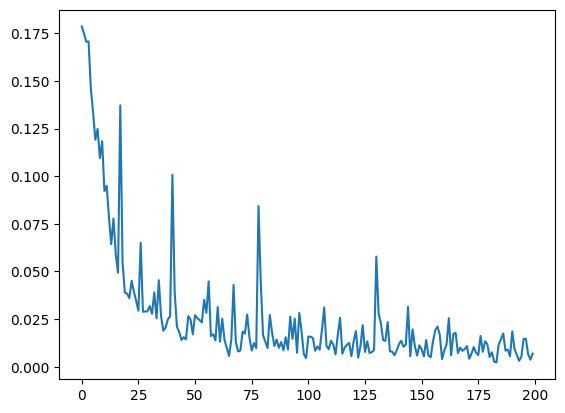

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
predicted = model.predict(test_ds)

32/32 [==============================] - 2s 36ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_ds,predicted)

ValueError: Found input variables with inconsistent numbers of samples: [32, 1000]

In [ ]:
len(test_ds)

32

In [ ]:
len(predicted)

1000

In [ ]:
test_ds2=keras.utils.image_dataset_from_directory(
    '/content/melanoma_cancer_dataset/test',labels='inferred',label_mode='int',batch_size=1,image_size=(256,256),color_mode='rgb'
    ,class_names=['benign', 'malignant'])

Found 1000 files belonging to 2 classes.


In [ ]:
len(test_ds2)

1000

In [ ]:
predictions = model.predict(test_ds2)

1000/1000 [==============================] - 5s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_ds2,predictions)

ValueError: Expected array-like (array or non-string sequence), got <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model.save('skincancer.keras')

In [ ]:
from PIL import Image

In [ ]:
image = Image.open('/content/images.jpg')

In [ ]:
new_image = image.resize((256,256,3))
new_image.save('myimage_500.jpg')

TypeError: argument 1 must be sequence of length 2, not 3

In [ ]:
model.predict('/content/myimage_500.jpg')

IndexError: tuple index out of range

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/content/C0044260-Melanoma_skin_cancer-SPL.max-600x600.jpg'
img = image.load_img(img_path, target_size=(256, 256))  # Adjust target_size as per your model's requirement

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape (1, 256, 256, 3)
img_array = np.expand_dims(img_array, axis=0)



# Make a prediction
prediction = model.predict(img_array)

# Print the predictions
if prediction[0] < 0.5:
    print("The image is predicted to be benign.")
else:
    print("The image is predicted to be malignant.")

1/1 [==============================] - 0s 68ms/step
The image is predicted to be malignant.


In [ ]:
pr=model.predict(test_ds)

32/32 [==============================] - 3s 78ms/step


In [ ]:
print(pr)

[[4.02263133e-03]
 [1.00000000e+00]
 [9.46072071e-26]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.07770445e-10]
 [7.40757724e-03]
 [2.27733948e-18]
 [1.00000000e+00]
 [2.03037096e-04]
 [2.36460865e-01]
 [1.75646127e-30]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.55716750e-20]
 [2.60580263e-15]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.88774401e-01]
 [1.00000000e+00]
 [2.48674791e-16]
 [9.95847702e-01]
 [1.00000000e+00]
 [3.33791610e-12]
 [2.21389178e-19]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.54864432e-16]
 [9.69338536e-01]
 [5.43158056e-15]
 [3.16065940e-13]
 [1.66248488e-20]
 [1.00000000e+00]
 [3.61240566e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.83817440e-01]
 [1.00000000e+00]
 [9.97995257e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.06549111e-06]
 [2.58954232e-22]
 [1.00000000e+00]
 [4.91019737e-19]
 [1.00000000e+00]
 [9.70588345e-29]
 [6.14131908e-17]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.44662405e-17]
 [9.436176

In [ ]:
model.save('./models', save_format='tf')

In [ ]:
model2=model.load('/content/skincancer.keras')

NameError: name 'model' is not defined

In [ ]:
model2 = keras.models.load_model('/content/skincancer.keras')

OSError: Unable to open file (file signature not found)

In [ ]:
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 batch_normalization (Batch  (None, 60, 60, 16)        6

In [ ]:
model2.get_weights()

[array([[[[-1.86204657e-01, -2.41381928e-01,  3.20681892e-02,
            1.54059887e-01, -9.08588469e-02,  4.02077556e-01,
           -9.09739733e-02,  4.32359576e-01, -1.07137017e-01,
           -1.61550403e-01, -3.95452953e-04,  2.35138744e-01,
           -3.12731981e-01, -1.55364200e-01,  4.98081148e-02,
            2.47536644e-01],
          [-1.03122480e-01, -4.31845114e-02, -1.37918657e-02,
           -2.82277852e-01, -4.66174856e-02,  4.98604566e-01,
           -3.43847692e-01, -1.77546263e-01,  1.18847620e-02,
           -6.62887394e-01, -1.34276018e-01,  5.74759305e-01,
            5.22237457e-02, -2.38690183e-01, -1.12033347e-02,
           -2.22911268e-01],
          [ 8.59134346e-02,  2.39252020e-03,  4.71961545e-03,
            2.78183430e-01, -1.90633312e-01,  5.80448627e-01,
           -3.53683352e-01, -1.23113781e-01, -7.29307607e-02,
           -1.13551319e-01, -1.23238578e-01,  6.45593584e-01,
           -1.60958558e-01, -5.66718392e-02, -3.95731479e-01,
            